In [17]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
if "hh_combination_fw_path" not in os.environ:
    os.environ['hh_combination_fw_path'] = os.path.abspath("../../")
outdir = "${hh_combination_fw_path}/output/projection_nonres_14TeV_3000ifb"
outdir = os.path.expandvars(outdir)

In [3]:
syst_scenarios = ['stat_only', 'baseline', 'theo_only', 'run2_syst']
studies = ['SM', 'kl_param', 'kl_individual']
channels = ['bbtautau', 'bbyy']
resonant_type = 'nonres'
combine_tag = 'A-bbtautau_bbyy-fullcorr'

In [4]:
def get_limit_data(scenario, study):
    data = {}
    for channel in channels:
        limit_path = os.path.join(outdir, scenario, study, 'limits', resonant_type, channel, 'limits.json')
        data[channel] = json.load(open(limit_path))
    limit_path = os.path.join(outdir, scenario, study, 'limits', resonant_type, 'combined',
                              combine_tag, 'limits.json')
    data['combined'] = json.load(open(limit_path))
    return data
def get_likelihood_data(scenario):
    data = {}
    for channel in channels:
        limit_path = os.path.join(outdir, scenario, 'kl_parameterised', 'likelihood_scans', resonant_type, channel, 
                                  'klambda_1', 'klambda.json')
        data[channel] = json.load(open(limit_path))
    limit_path = os.path.join(outdir, scenario, 'kl_parameterised', 'likelihood_scans', resonant_type, 'combined',
                              combine_tag, 'klambda_1', 'klambda.json')
    data['combined'] = json.load(open(limit_path))
    return data
def get_pvalue_data(scenario):
    data = {}
    for channel in channels:
        limit_path = os.path.join(outdir, scenario, 'SM', 'pvalues', resonant_type, channel, 
                                  'result_asimovData_1_NP_Nominal_mu_0.json')
        data[channel] = json.load(open(limit_path))
    limit_path = os.path.join(outdir, scenario, 'SM', 'pvalues', resonant_type, 'combined',
                              combine_tag, 'result_asimovData_1_NP_Nominal_mu_0.json')
    data['combined'] = json.load(open(limit_path))
    for channel in data:
        data[channel] = {k:v for k,v in data[channel].items() if k in ['pvalue', 'significance', 'qmu']}
    return data

In [5]:
syst_scenario_label_map = {
    'stat_only': r"No syst. unc.",
    'baseline' : r"Baseline",
    'theo_only': r"Theoretical unc. halved",
    'run2_syst': r"Run-2 syst. unc.",
}
channel_label_map = {
    'bbyy': r"$\mathrm{b\bar{b}\gamma\gamma}$",
    'bbtautau': r"$\mathrm{b\bar{b}\tau^+\tau^-}$",
    'combined': r"Combined",
}
channel_text = {
    'bbtautau': r'$\mathrm{HH\rightarrow b\bar{b}\tau^+\tau^-}$',
    'bbyy': r'$\mathrm{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'combined': r'$\mathrm{HH\rightarrow b\bar{b}\tau^+\tau^-} + b\bar{b}\gamma\gamma$',
}
syst_scenario_text = {
    'stat_only': r"Non-resonant HH, No syst. unc.",
    'baseline' : r"Non-resonant HH, Baseline",
    'theo_only': r"Non-resonant HH, Theoretical unc. halved",
    'run2_syst': r"Non-resonant HH, Run-2 syst. unc.",
}

## 1. SM Limit Plot

### 1.1 Data Loading

In [6]:
sm_limit_df = {}
sm_limit_df2 = {}
for scenario in syst_scenarios:
    data = get_limit_data(scenario, 'SM')
    # flatten 1 point limit
    for k,v in data.items():
        for p,v_ in v.items():
            data[k][p] = v_[0]
    # channel-based df
    for channel in data:
        if channel not in sm_limit_df2:
            sm_limit_df2[channel] = {}
        sm_limit_df2[channel][scenario] = data[channel]
    # scenario-based df
    sm_limit_df[scenario] = pd.DataFrame(data)
for channel in sm_limit_df2:
    sm_limit_df2[channel] = pd.DataFrame(sm_limit_df2[channel])

In [75]:
sm_limit_df['run2_syst']

,bbtautau,bbyy,combined
mass,0.000000,0.000000,0.000000
0,1.370005,1.891102,1.157710
2,2.985816,4.220709,2.488254
1,1.963105,2.788798,1.654824
-1,0.987164,1.362644,0.834194
-2,0.735317,1.015003,0.621373
obs,0.000000,0.000000,0.000000
inj,0.000000,0.000000,0.000000


In [7]:
sm_limit_df['baseline']

,bbtautau,bbyy,combined
mass,0.000000,0.000000,0.000000
0,0.711052,0.929542,0.576716
2,1.424729,1.909094,1.141549
1,1.008274,1.334810,0.813049
-1,0.512353,0.669787,0.415556
-2,0.381640,0.498909,0.309539
obs,0.000000,0.000000,0.000000
inj,0.000000,0.000000,0.000000


In [8]:
sm_limit_df2['bbyy']

,stat_only,baseline,theo_only,run2_syst
mass,0.000000,0.000000,0.000000,0.000000
0,0.855444,0.929542,1.725337,1.891102
2,1.657802,1.909094,3.423468,4.220709
1,1.206944,1.334810,2.440336,2.788798
-1,0.616395,0.669787,1.243201,1.362644
-2,0.459139,0.498909,0.926033,1.015003
obs,0.000000,0.000000,0.000000,0.000000
inj,0.000000,0.000000,0.000000,0.000000


In [9]:
sm_limit_df2['bbtautau']

,stat_only,baseline,theo_only,run2_syst
mass,0.000000,0.000000,0.000000,0.000000
0,0.494825,0.711052,1.068999,1.370005
2,0.940826,1.424729,2.095071,2.985816
1,0.692968,1.008274,1.503529,1.963105
-1,0.356549,0.512353,0.770273,0.987164
-2,0.265585,0.381640,0.573760,0.735317
obs,0.000000,0.000000,0.000000,0.000000
inj,0.000000,0.000000,0.000000,0.000000


In [10]:
sm_limit_df2['combined']

,stat_only,baseline,theo_only,run2_syst
mass,0.000000,0.000000,0.000000,0.000000
0,0.423436,0.576716,0.924174,1.157710
2,0.803793,1.141549,1.806392,2.488254
1,0.592627,0.813049,1.298665,1.654824
-1,0.305109,0.415556,0.665919,0.834194
-2,0.227269,0.309539,0.496028,0.621373
obs,0.000000,0.000000,0.000000,0.000000
inj,0.000000,0.000000,0.000000,0.000000


### 1.2 Plotting

In [11]:
from quickstats.plots import UpperLimit1DPlot

Welcome to JupyROOT 6.22/08

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



<Figure size 432x288 with 0 Axes>

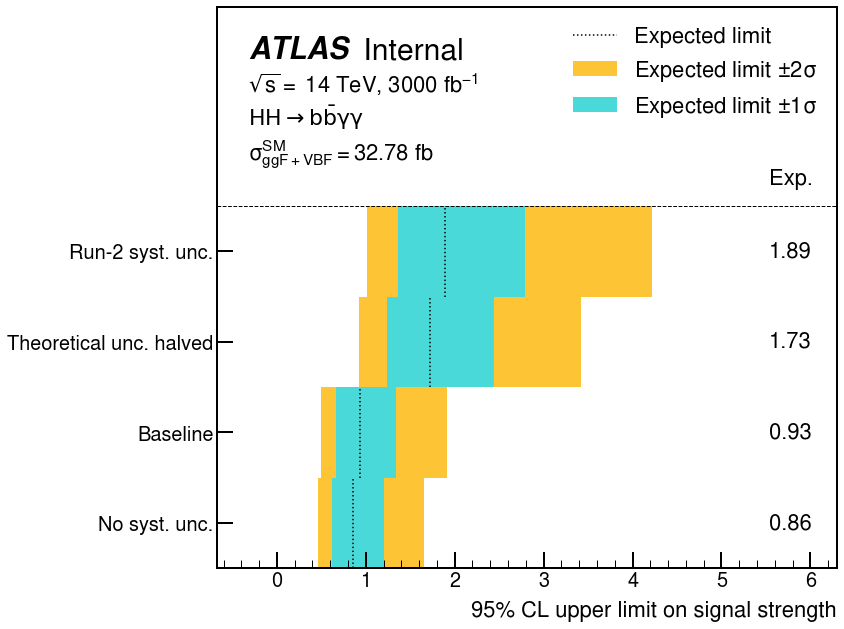

In [19]:
channel = 'bbyy'
analysis_label_options = {'fontsize':30, 'energy': '14 TeV', 
                          'lumi': '3000 fb$^{-1}$',
                          'extra_text': channel_text[channel] + '//' + r'$\sigma_{ggF+VBF}^{SM}=32.78$ fb'}
plotter = UpperLimit1DPlot(sm_limit_df2[channel], syst_scenario_label_map,
                           analysis_label_options=analysis_label_options)
plotter.draw(xlabel=r"95% CL upper limit on signal strength", draw_observed=False)
plt.savefig(f"plots/SM_limit_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

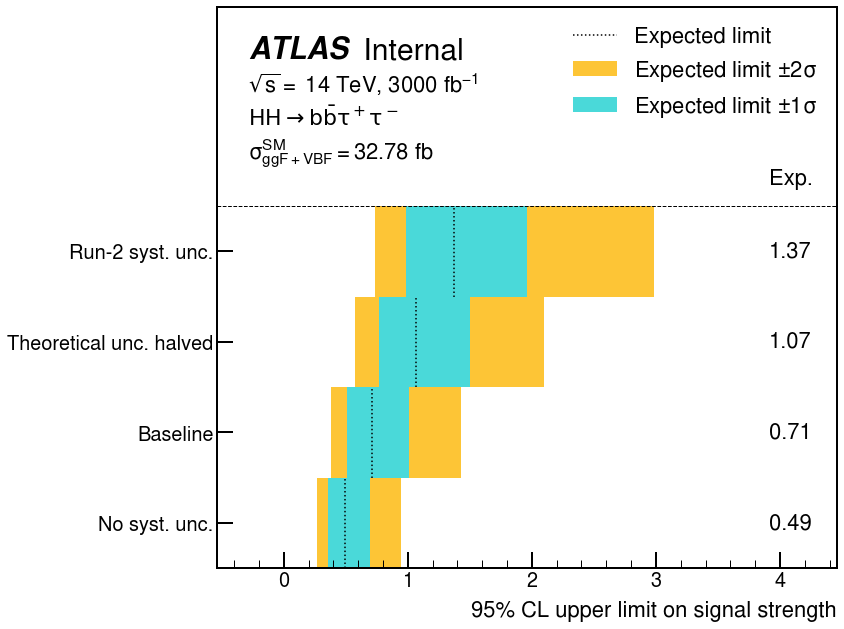

In [20]:
channel = 'bbtautau'
analysis_label_options = {'fontsize':30, 'energy': '14 TeV', 
                          'lumi': '3000 fb$^{-1}$',
                          'extra_text': channel_text[channel] + '//' + r'$\sigma_{ggF+VBF}^{SM}=32.78$ fb'}
plotter = UpperLimit1DPlot(sm_limit_df2[channel], syst_scenario_label_map,
                           analysis_label_options=analysis_label_options)
plotter.draw(xlabel=r"95% CL upper limit on signal strength", draw_observed=False)
plt.savefig(f"plots/SM_limit_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

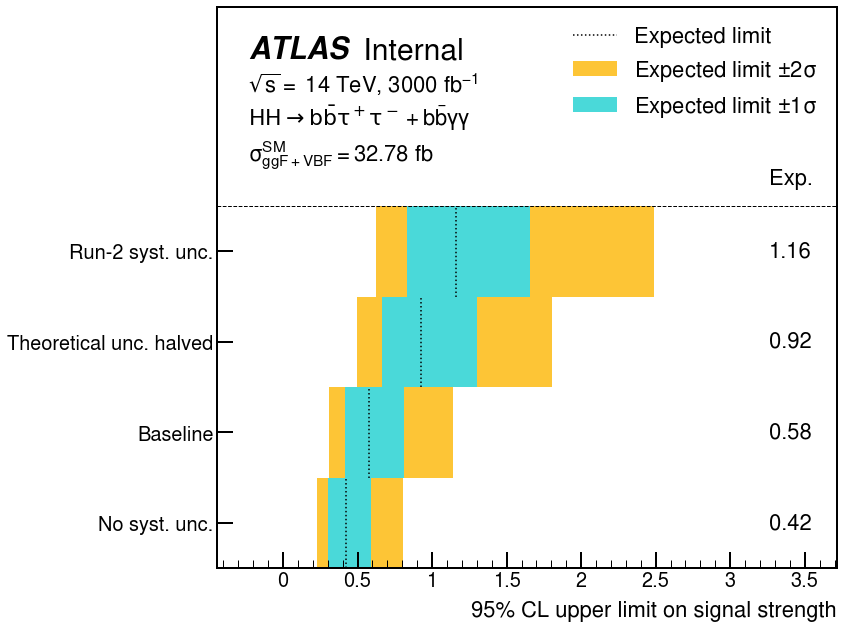

In [21]:
channel = 'combined'
analysis_label_options = {'fontsize':30, 'energy': '14 TeV', 
                          'lumi': '3000 fb$^{-1}$',
                          'extra_text': channel_text[channel] + '//' + r'$\sigma_{ggF+VBF}^{SM}=32.78$ fb'}
plotter = UpperLimit1DPlot(sm_limit_df2[channel], syst_scenario_label_map,
                           analysis_label_options=analysis_label_options)
plotter.draw(xlabel=r"95% CL upper limit on signal strength", draw_observed=False)
plt.savefig(f"plots/SM_limit_{channel}.pdf", bbox_inches="tight")

## 2. KL Limit Scan

### 2.1 Data Loading

#### 2.1a Individual workspace limits

In [23]:
kl_individual_limit_df  = {}
kl_individual_limit_df2 = {}
for scenario in syst_scenarios:
    kl_individual_limit_df[scenario] = {}
    data = get_limit_data(scenario, 'kl_individual')
    for channel in data:
        df = pd.DataFrame(data[channel]).set_index(['klambda'])
        if channel not in kl_individual_limit_df2:
            kl_individual_limit_df2[channel] = {}
        kl_individual_limit_df[scenario][channel] = df
        kl_individual_limit_df2[channel][scenario] = df

#### 2.1b Parameterised workspace limits

In [24]:
kl_param_limit_df  = {}
kl_param_limit_df2 = {}
for scenario in syst_scenarios:
    kl_param_limit_df[scenario] = {}
    data = get_limit_data(scenario, 'kl_parameterised')
    for channel in data:
        df = pd.DataFrame(data[channel]).set_index(['klambda'])
        if channel not in kl_param_limit_df2:
            kl_param_limit_df2[channel] = {}
        kl_param_limit_df[scenario][channel] = df
        kl_param_limit_df2[channel][scenario] = df

### 2.2 Plotting

In [25]:
from quickstats.plots import UpperLimit2DPlot

In [56]:
import math
#Now using values from LHCWHGHHHXGGBGGGXXX
SCALE_GGF = 31.05/31.0358 #31.02/31.0358   #correct to xs at mH = 125.09 
SCALE_VBF = 1.726/(4.581-4.245+1.359) # 1.723/(4.581-4.245+1.359)

def xs_ggF(kl):
    #https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Latest_recommendations_for_gluon
    return (70.3874-50.4111*kl+11.0595*kl**2)*SCALE_GGF #XS in fb

def xs_VBF(kl):
    #https://indico.cern.ch/event/995807/contributions/4184798/attachments/2175756/3683303/VBFXSec.pdf
    return (4.581-4.245*kl+1.359*kl**2)*SCALE_VBF

def xs_HH(kl, s=14):
    if s == 13:
        return xs_ggF(kl) + xs_VBF(kl)
    elif s == 14:
        return xs_ggF(kl)*1.18 + xs_VBF(kl) * 1.19

# When adding 2 independent Gaussians (e.g. ggF and VBF XS) we can simply add their means and add their sigmas in quadrature
def sigma_upper_ggF(kl):
    #https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Latest_recommendations_for_gluon
    #add the std on ggF HH due to qcd scale, PDF, and mtop in quadrature
    #return xs_ggF(kl) * math.sqrt((max(72.0744-51.7362*kl+11.3712*kl**2, 70.9286-51.5708*kl+11.4497*kl**2) * SCALE_GGF / xs_ggF(kl) - 1)**2 + 0.03**2 + 0.026**2)
    #new mtop uncertainty:
    return xs_ggF(kl) * math.sqrt((max(76.6075 - 56.4818*kl + 12.635*kl**2, 75.4617 - 56.3164*kl + 12.7135*kl**2) * SCALE_GGF / xs_ggF(kl) - 1)**2 + 0.03**2)

def sigma_upper_VBF(kl):
    #from klambda = 1
    return xs_VBF(kl) * math.sqrt(0.0003**2 + 0.021**2)

def sigma_upper_HH(kl, s=14):
    error = math.sqrt(sigma_upper_ggF(kl)**2 + sigma_upper_VBF(kl)**2)
    if s == 14:
        error /= 2
    return error

def xs_upper_HH(kl, s=14):
    return xs_HH(kl, s) + sigma_upper_HH(kl, s)

def sigma_lower_ggF(kl):
    #https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Latest_recommendations_for_gluon
    #add the std on ggF HH due to qcd scale, PDF, and mtop in quadrature
    #return xs_ggF(kl) * math.sqrt((min(66.0621-46.7458*kl+10.1673*kl**2, 66.7581-47.721*kl+10.4535*kl**2) * SCALE_GGF / xs_ggF(kl) - 1)**2 + 0.03**2 + 0.026**2)
    #new mtop uncertainty:
    return xs_ggF(kl) * math.sqrt((min(57.6809 - 42.9905*kl + 9.58474*kl**2, 58.3769 - 43.9657*kl + 9.87094*kl**2) * SCALE_GGF / xs_ggF(kl) - 1)**2 + 0.03**2)

def sigma_lower_VBF(kl):
    return xs_VBF(kl) * math.sqrt(0.0004**2 + 0.021**2)

def sigma_lower_HH(kl, s=14):
    error = math.sqrt(sigma_lower_ggF(kl)**2 + sigma_lower_VBF(kl)**2)
    if s == 14:
        error /= 2
    return error
    
def xs_lower_HH(kl, s=14):
    return xs_HH(kl, s) - sigma_lower_HH(kl, s)

def get_intersections(lambdas, n_exp, lambdas_th, n_th):
    # get the intersection between expected and theory prediction
    
    # interpolate expected limit with same number of datapoints as used in theory prediction
    interpolated_limit = np.interp(lambdas_th, lambdas, n_exp) 

    #limitm1 = n*np.array(limit_bands[0]) - 1
    limitm1 = interpolated_limit - n_th 
    idx = np.argwhere(np.diff(np.sign(limitm1))).flatten() # determines what index intersection points are at 

    #linear interpolation to get exact intercepts: x = x1 + (x2-x1)/(y2-y1) * (y-y1)
    #y = 0 -> x = x1 - (x2-x1)/(y2-y1) * y1
    intersections = [lambdas_th[x] - (lambdas_th[x+1] - lambdas_th[x])/(limitm1[x+1] - limitm1[x]) * limitm1[x] for x in idx]
    return intersections

In [27]:
klambda_values = kl_individual_limit_df2['bbyy']['baseline'].index.astype(float).values
scale_factor = np.array([xs_HH(kl, s=14) for kl in klambda_values])

klambda_theory_values = np.linspace(min(klambda_values), max(klambda_values), 1000) 
theory_xs_values = np.array([xs_HH(kl, s=14) for kl in klambda_theory_values])
theory_xs_lower = np.array([xs_lower_HH(kl, s=14) for kl in klambda_theory_values])
theory_xs_upper = np.array([xs_upper_HH(kl, s=14) for kl in klambda_theory_values])

#### 3.2a Individual workspace plot

<Figure size 432x288 with 0 Axes>

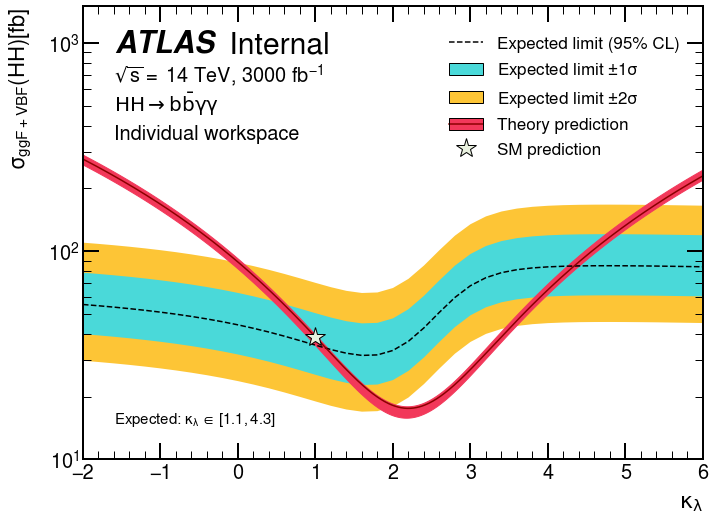

In [66]:
syst_scenario = 'baseline'
channel = 'bbyy'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Individual workspace'    
}
styles = {
    'legend':{
        'loc': (0.58, 0.65),
        'fontsize': 17
    }
}

plotter = UpperLimit2DPlot(kl_individual_limit_df2[channel][syst_scenario], 
                           scale_factor=scale_factor, styles=styles,
                           analysis_label_options=analysis_label_options)
plotter.add_curve(klambda_theory_values, theory_xs_values, theory_xs_lower, theory_xs_upper, 
                  label="Theory prediction")
plotter.add_highlight(1, xs_HH(1, s=14),
                      label="SM prediction")
ax = plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
                  draw_observed=False, log=True, ylim=[10, 1.5e3], xlim=[-2,6])
intersections = get_intersections(klambda_values, 
                                  scale_factor*kl_individual_limit_df2[channel][syst_scenario]['0'],
                                  klambda_theory_values, theory_xs_values)
ax.annotate(r'Expected: $\kappa_\lambda \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
            (0.05, 0.08), xycoords = 'axes fraction', fontsize = 15)
plt.savefig(f"plots/kl_limit_{syst_scenario}_individual_ws_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

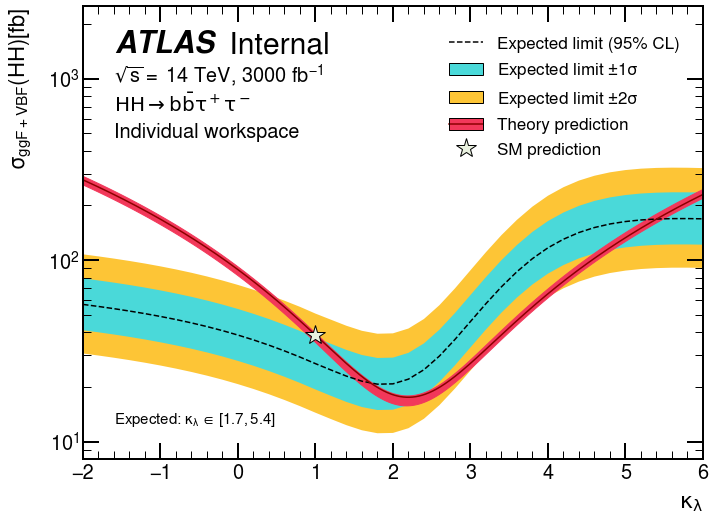

In [65]:
syst_scenario = 'baseline'
channel = 'bbtautau'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Individual workspace'    
}
styles = {
    'legend':{
        'loc': (0.58, 0.65),
        'fontsize': 17
    }
}

plotter = UpperLimit2DPlot(kl_individual_limit_df2[channel][syst_scenario], 
                           scale_factor=scale_factor, styles=styles,
                           analysis_label_options=analysis_label_options)
plotter.add_curve(klambda_theory_values, theory_xs_values, theory_xs_lower, theory_xs_upper, 
                  label="Theory prediction")
plotter.add_highlight(1, xs_HH(1, s=14),
                      label="SM prediction")
ax = plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
             draw_observed=False, log=True, ylim=[8, 2.5e3], xlim=[-2,6])
intersections = get_intersections(klambda_values, 
                                  scale_factor*kl_individual_limit_df2[channel][syst_scenario]['0'],
                                  klambda_theory_values, theory_xs_values)
ax.annotate(r'Expected: $\kappa_\lambda \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
            (0.05, 0.08), xycoords = 'axes fraction', fontsize = 15)
plt.savefig(f"plots/kl_limit_{syst_scenario}_individual_ws_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

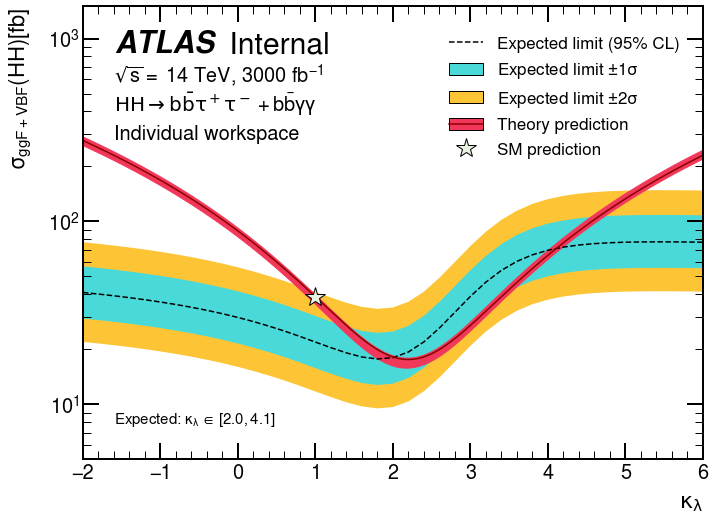

In [67]:
syst_scenario = 'baseline'
channel = 'combined'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Individual workspace'
}
styles = {
    'legend':{
        'loc': (0.58, 0.65),
        'fontsize': 17
    }
}

plotter = UpperLimit2DPlot(kl_individual_limit_df2[channel][syst_scenario], 
                           scale_factor=scale_factor, styles=styles,
                           analysis_label_options=analysis_label_options)
plotter.add_curve(klambda_theory_values, theory_xs_values, theory_xs_lower, theory_xs_upper, 
                  label="Theory prediction")
plotter.add_highlight(1, xs_HH(1, s=14),
                      label="SM prediction")
ax = plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
             draw_observed=False, log=True, ylim=[5, 1.5e3], xlim=[-2,6])
intersections = get_intersections(klambda_values, 
                                  scale_factor*kl_individual_limit_df2[channel][syst_scenario]['0'],
                                  klambda_theory_values, theory_xs_values)
ax.annotate(r'Expected: $\kappa_\lambda \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
            (0.05, 0.08), xycoords = 'axes fraction', fontsize = 15)
plt.savefig(f"plots/kl_limit_{syst_scenario}_individual_ws_{channel}.pdf", bbox_inches="tight")

#### 3.2b Parameterised workspace plot

<Figure size 432x288 with 0 Axes>

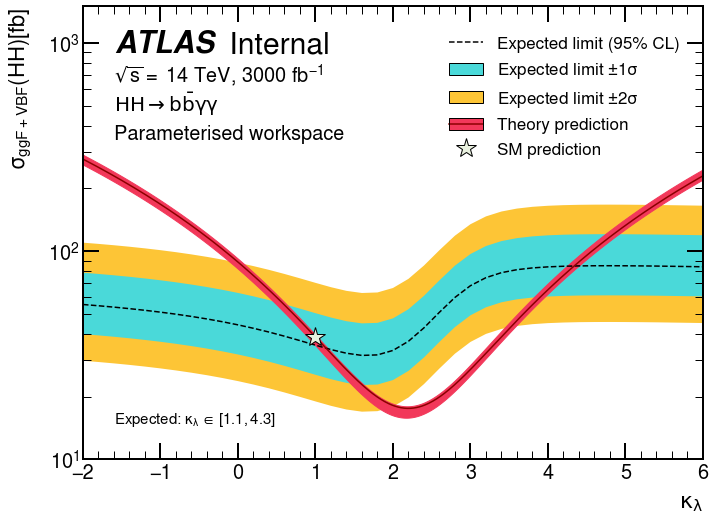

In [68]:
syst_scenario = 'baseline'
channel = 'bbyy'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Parameterised workspace'    
}
styles = {
    'legend':{
        'loc': (0.58, 0.65),
        'fontsize': 17
    }
}

plotter = UpperLimit2DPlot(kl_param_limit_df2[channel][syst_scenario], 
                           scale_factor=scale_factor, styles=styles,
                           analysis_label_options=analysis_label_options)
plotter.add_curve(klambda_theory_values, theory_xs_values, theory_xs_lower, theory_xs_upper, 
                  label="Theory prediction")
plotter.add_highlight(1, xs_HH(1, s=14),
                      label="SM prediction")
ax = plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
             draw_observed=False, log=True, ylim=[10, 1.5e3], xlim=[-2,6])
intersections = get_intersections(klambda_values, 
                                  scale_factor*kl_individual_limit_df2[channel][syst_scenario]['0'],
                                  klambda_theory_values, theory_xs_values)
ax.annotate(r'Expected: $\kappa_\lambda \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
            (0.05, 0.08), xycoords = 'axes fraction', fontsize = 15)
plt.savefig(f"plots/kl_limit_{syst_scenario}_parameterised_ws_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

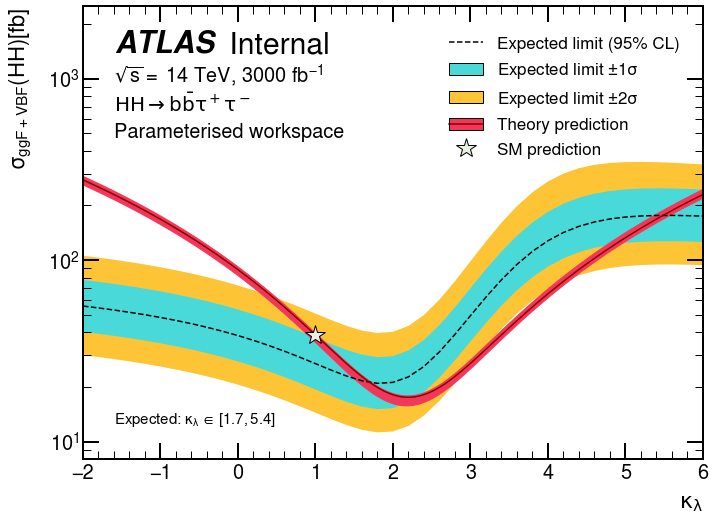

In [69]:
syst_scenario = 'baseline'
channel = 'bbtautau'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Parameterised workspace'    
}
styles = {
    'legend':{
        'loc': (0.58, 0.65),
        'fontsize': 17
    }
}

plotter = UpperLimit2DPlot(kl_param_limit_df2[channel][syst_scenario], 
                           scale_factor=scale_factor, styles=styles,
                           analysis_label_options=analysis_label_options)
plotter.add_curve(klambda_theory_values, theory_xs_values, theory_xs_lower, theory_xs_upper, 
                  label="Theory prediction")
plotter.add_highlight(1, xs_HH(1, s=14),
                      label="SM prediction")
ax = plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
             draw_observed=False, log=True, ylim=[8, 2.5e3], xlim=[-2,6])
intersections = get_intersections(klambda_values, 
                                  scale_factor*kl_individual_limit_df2[channel][syst_scenario]['0'],
                                  klambda_theory_values, theory_xs_values)
ax.annotate(r'Expected: $\kappa_\lambda \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
            (0.05, 0.08), xycoords = 'axes fraction', fontsize = 15)
plt.savefig(f"plots/kl_limit_{syst_scenario}_parameterised_ws_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

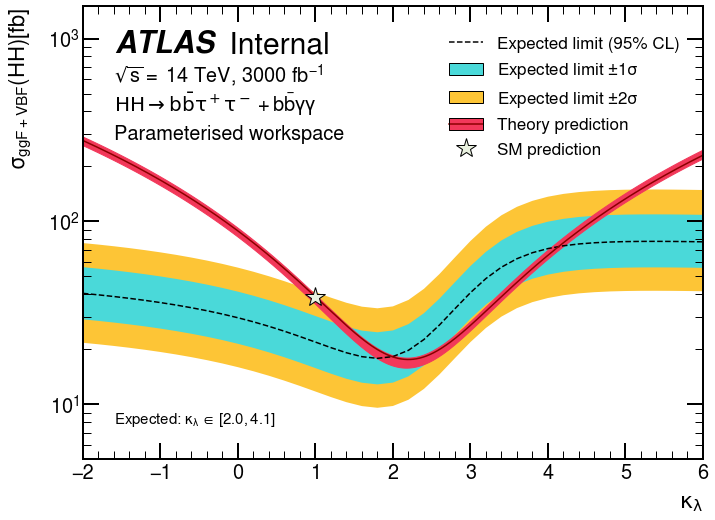

In [70]:
syst_scenario = 'baseline'
channel = 'combined'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Parameterised workspace'    
}
styles = {
    'legend':{
        'loc': (0.58, 0.65),
        'fontsize': 17
    }
}

plotter = UpperLimit2DPlot(kl_param_limit_df2[channel][syst_scenario], 
                           scale_factor=scale_factor, styles=styles,
                           analysis_label_options=analysis_label_options)
plotter.add_curve(klambda_theory_values, theory_xs_values, theory_xs_lower, theory_xs_upper, 
                  label="Theory prediction")
plotter.add_highlight(1, xs_HH(1, s=14),
                      label="SM prediction")
ax = plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
             draw_observed=False, log=True, ylim=[5, 1.5e3], xlim=[-2,6])
intersections = get_intersections(klambda_values, 
                                  scale_factor*kl_individual_limit_df2[channel][syst_scenario]['0'],
                                  klambda_theory_values, theory_xs_values)
ax.annotate(r'Expected: $\kappa_\lambda \in [%.1f, %.1f]$' %(intersections[0], intersections[1]), 
            (0.05, 0.08), xycoords = 'axes fraction', fontsize = 15)
plt.savefig(f"plots/kl_limit_{syst_scenario}_parameterised_ws_{channel}.pdf", bbox_inches="tight")

#### 3.2c Parameterised vs Individual workspace plot

<Figure size 432x288 with 0 Axes>

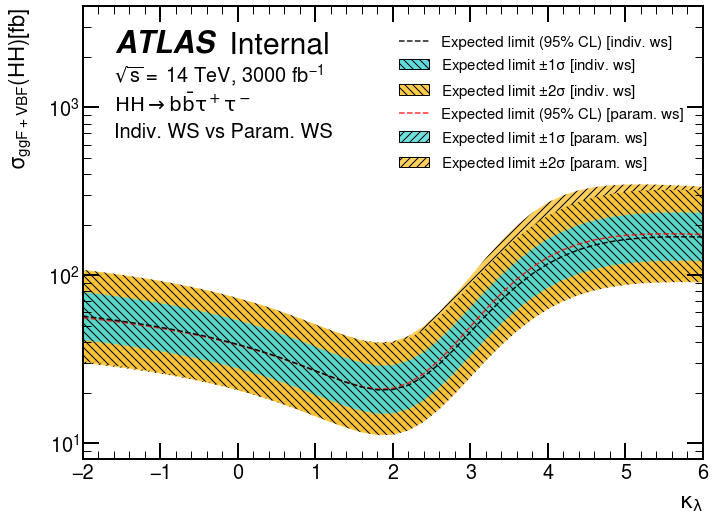

In [38]:
syst_scenario = 'baseline'
channel = 'bbtautau'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Indiv. WS vs Param. WS'    
}
styles = {
    'legend':{
        'loc': (0.5, 0.62),
        'fontsize': 15
    }
}

LABELS = {
    '2sigma': 'Expected limit $\pm 2\sigma$ [indiv. ws]',
    '1sigma': 'Expected limit $\pm 1\sigma$ [indiv. ws]',
    'expected': 'Expected limit (95% CL) [indiv. ws]',
    'observed': 'Observed limit (95% CL) [indiv. ws]'
}

LABELS_SEC = {
    '2sigma': 'Expected limit $\pm 2\sigma$ [param. ws]',
    '1sigma': 'Expected limit $\pm 1\sigma$ [param. ws]',
    'expected': 'Expected limit (95% CL) [param. ws]',
    'observed': 'Observed limit (95% CL) [param. ws]'
}

plotter = UpperLimit2DPlot(kl_individual_limit_df2[channel][syst_scenario],
                           kl_param_limit_df2[channel][syst_scenario],
                           scale_factor=scale_factor, styles=styles,
                           labels=LABELS,
                           labels_sec=LABELS_SEC,
                           analysis_label_options=analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
             draw_observed=False, log=True, ylim=[8, 4e3], xlim=[-2,6])
plt.savefig(f"plots/kl_limit_{syst_scenario}_comparison_ws_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

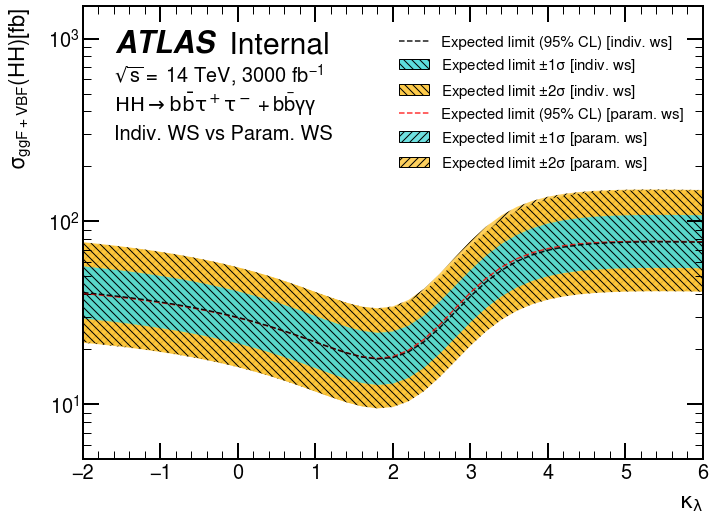

In [39]:
syst_scenario = 'baseline'
channel = 'combined'

analysis_label_options = {
    'loc': (0.05, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30,
    'extra_text':channel_text[channel] + '//Indiv. WS vs Param. WS'    
}
styles = {
    'legend':{
        'loc': (0.5, 0.62),
        'fontsize': 15
    }
}

LABELS = {
    '2sigma': 'Expected limit $\pm 2\sigma$ [indiv. ws]',
    '1sigma': 'Expected limit $\pm 1\sigma$ [indiv. ws]',
    'expected': 'Expected limit (95% CL) [indiv. ws]',
    'observed': 'Observed limit (95% CL) [indiv. ws]'
}

LABELS_SEC = {
    '2sigma': 'Expected limit $\pm 2\sigma$ [param. ws]',
    '1sigma': 'Expected limit $\pm 1\sigma$ [param. ws]',
    'expected': 'Expected limit (95% CL) [param. ws]',
    'observed': 'Observed limit (95% CL) [param. ws]'
}

plotter = UpperLimit2DPlot(kl_individual_limit_df2[channel][syst_scenario],
                           kl_param_limit_df2[channel][syst_scenario],
                           scale_factor=scale_factor, styles=styles,
                           labels=LABELS,
                           labels_sec=LABELS_SEC,
                           analysis_label_options=analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ylabel=r"$\sigma_{ggF+VBF}(HH) [fb]$",
             draw_observed=False, log=True, ylim=[5, 1.5e3], xlim=[-2,6])
plt.savefig(f"plots/kl_limit_{syst_scenario}_comparison_ws_{channel}.pdf", bbox_inches="tight")

## 3. KL Likelihood Scan

### 3.1 Data Loading

In [42]:
likelihood_df  = {}
likelihood_df2 = {}
for scenario in syst_scenarios:
    likelihood_df[scenario] = {}
    data = get_likelihood_data(scenario)
    for channel in data:
        df = pd.DataFrame(data[channel]).dropna()
        if channel not in likelihood_df2:
            likelihood_df2[channel] = {}
        likelihood_df[scenario][channel] = df
        likelihood_df2[channel][scenario] = df

### 3.2 Plotting

In [41]:
from quickstats.plots import Likelihood1DPlot
from quickstats.plots.color_schemes import QUICKSTATS_PALETTES
color_pallete = QUICKSTATS_PALETTES['darklines']

#### 3.2a Channel-based plot

In [43]:
styles_map = {
    'stat_only': {"color": color_pallete[0], "marker": "o"},
    'baseline': {"color": color_pallete[1], "marker": "o"},
    'theo_only': {"color": color_pallete[2], "marker": "o"},
    'run2_syst': {"color": color_pallete[3], "marker": "o"}
}

styles = {
    'legend':{
        'loc': (0.25, 0.45)
    }
}
analysis_label_options = {
    'loc': (0.25, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30
}

<Figure size 432x288 with 0 Axes>

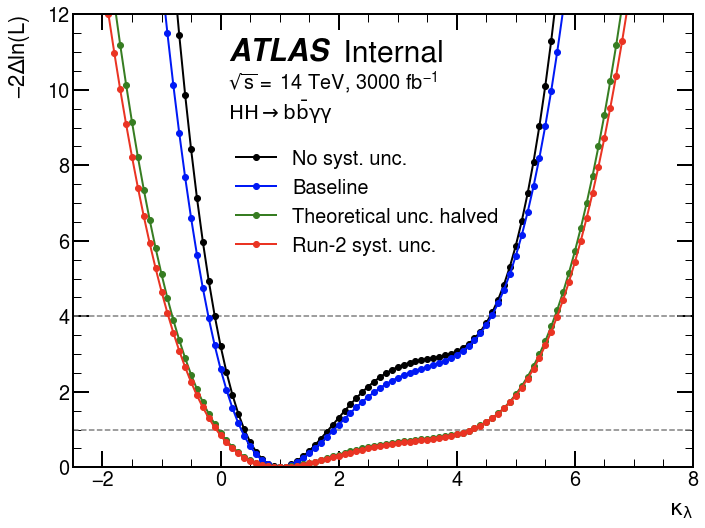

In [44]:
channel = 'bbyy'
channel_analysis_label_options = {**analysis_label_options, 'extra_text':channel_text[channel]}
plotter = Likelihood1DPlot(likelihood_df2[channel], label_map=syst_scenario_label_map, styles_map=styles_map, 
                           styles=styles, analysis_label_options=channel_analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ymax=12, xmin=-2.5, xmax=8, draw_sigma_line=True)
plt.savefig(f"plots/likelihood_scan_mu_1_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

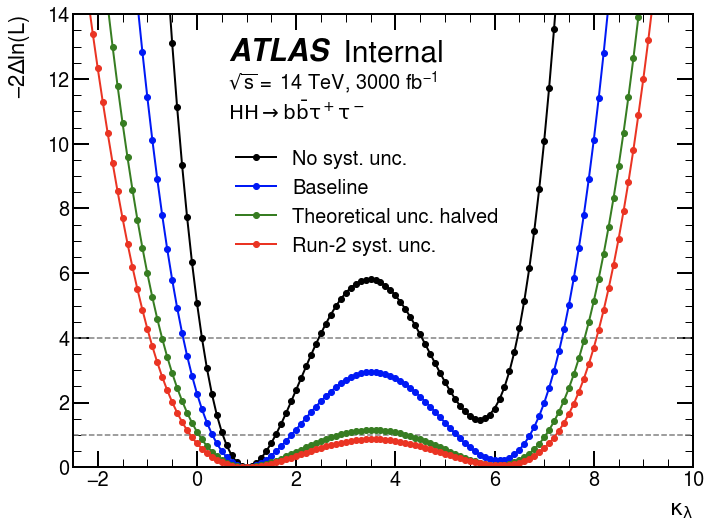

In [45]:
channel = 'bbtautau'
channel_analysis_label_options = {**analysis_label_options, 'extra_text':channel_text[channel]}
plotter = Likelihood1DPlot(likelihood_df2[channel], label_map=syst_scenario_label_map, styles_map=styles_map, 
                           styles=styles, analysis_label_options=channel_analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ymax=14, xmin=-2.5, xmax=10, draw_sigma_line=True)
plt.savefig(f"plots/likelihood_scan_mu_1_{channel}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

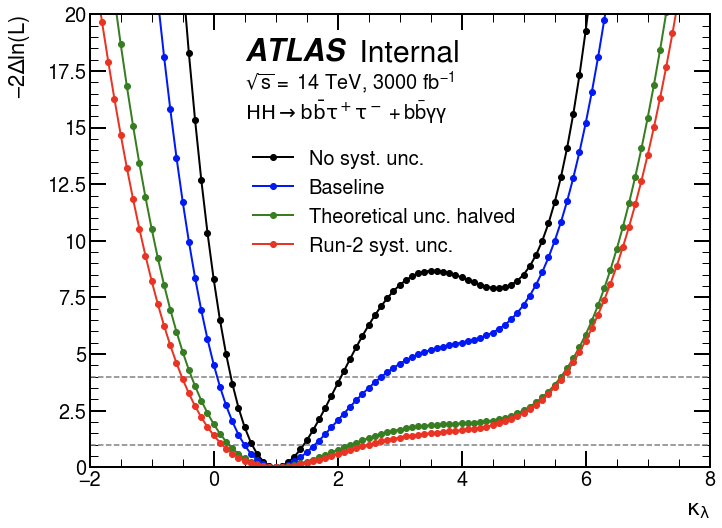

In [46]:
channel = 'combined'
channel_analysis_label_options = {**analysis_label_options, 'extra_text':channel_text[channel]}
plotter = Likelihood1DPlot(likelihood_df2[channel], label_map=syst_scenario_label_map, styles_map=styles_map, 
                           styles=styles, analysis_label_options=channel_analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ymax=20, xmin=-2, xmax=8, draw_sigma_line=True)
plt.savefig(f"plots/likelihood_scan_mu_1_{channel}.pdf", bbox_inches="tight")

#### 3.2a Scenario-based plot

In [47]:
styles_map = {
    'bbyy'    : {"color": color_pallete[2], "marker": "o"},
    'bbtautau': {"color": color_pallete[1], "marker": "o"},
    'combined': {"color": color_pallete[0], "marker": "o"}
}

<Figure size 432x288 with 0 Axes>

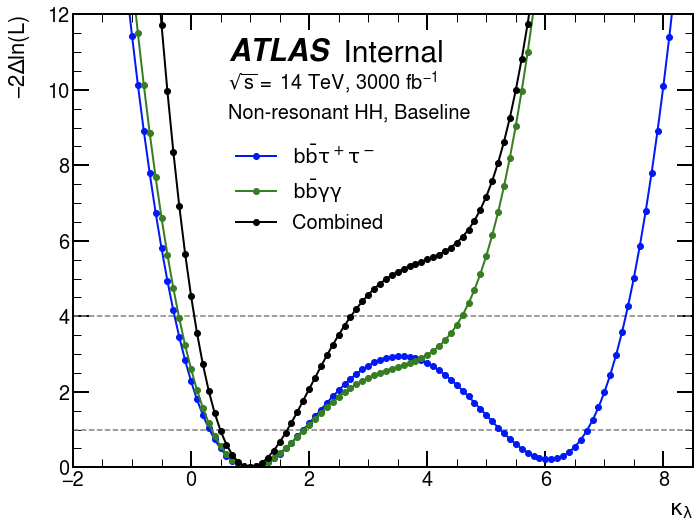

In [48]:
styles = {
    'legend':{
        'loc': (0.25, 0.5)
    }
}
analysis_label_options = {
    'loc': (0.25, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30
}
syst_scenario = 'baseline'
channel_analysis_label_options = {**analysis_label_options, 'extra_text':syst_scenario_text[syst_scenario]}
plotter = Likelihood1DPlot(likelihood_df[syst_scenario], label_map=channel_label_map, styles_map=styles_map, 
                           styles=styles, analysis_label_options=channel_analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ymax=12, xmin=-2, xmax=8.5, draw_sigma_line=True)
plt.savefig(f"plots/likelihood_scan_mu_1_{syst_scenario}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

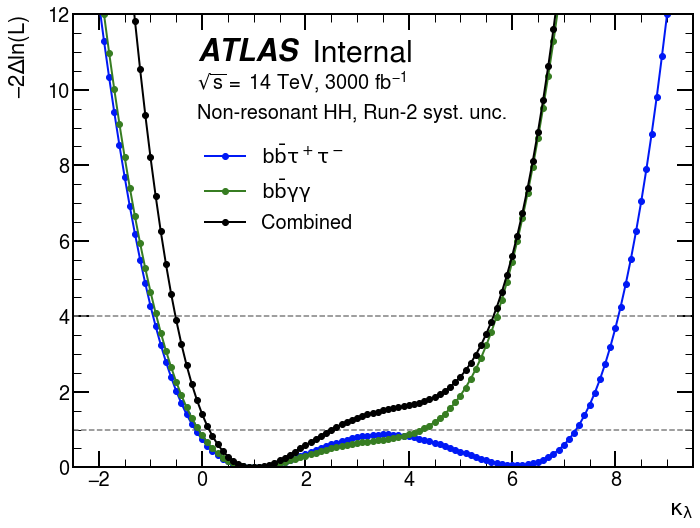

In [49]:
styles = {
    'legend':{
        'loc': (0.2, 0.5)
    }
}
analysis_label_options = {
    'loc': (0.2, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30
}

syst_scenario = 'run2_syst'
channel_analysis_label_options = {**analysis_label_options, 'extra_text':syst_scenario_text[syst_scenario]}
plotter = Likelihood1DPlot(likelihood_df[syst_scenario], label_map=channel_label_map, styles_map=styles_map, 
                           styles=styles, analysis_label_options=channel_analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ymax=12, xmin=-2.5, xmax=9.5, draw_sigma_line=True)
plt.savefig(f"plots/likelihood_scan_mu_1_{syst_scenario}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

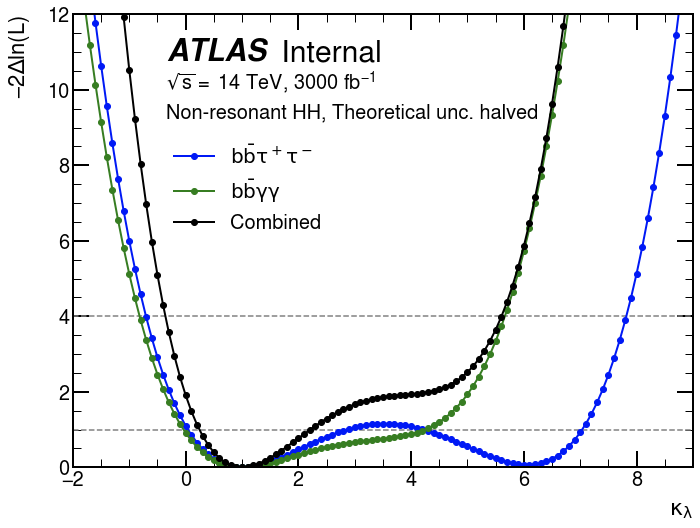

In [50]:
styles = {
    'legend':{
        'loc': (0.15, 0.5)
    }
}
analysis_label_options = {
    'loc': (0.15, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30
}

syst_scenario = 'theo_only'
channel_analysis_label_options = {**analysis_label_options, 'extra_text':syst_scenario_text[syst_scenario]}
plotter = Likelihood1DPlot(likelihood_df[syst_scenario], label_map=channel_label_map, styles_map=styles_map, 
                           styles=styles, analysis_label_options=channel_analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ymax=12, xmin=-2, xmax=9, draw_sigma_line=True)
plt.savefig(f"plots/likelihood_scan_mu_1_{syst_scenario}.pdf", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

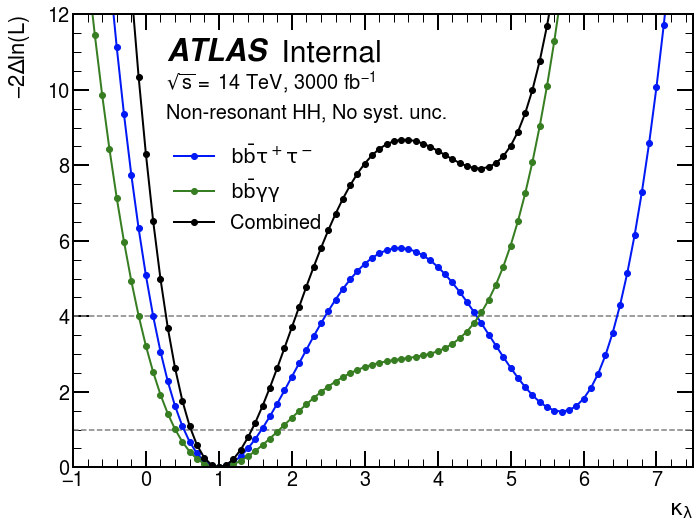

In [51]:
styles = {
    'legend':{
        'loc': (0.15, 0.5)
    }
}
analysis_label_options = {
    'loc': (0.15, 0.95),
    'energy': '14 TeV',
    'lumi': r'3000 fb$^{-1}$',
    'fontsize': 30
}

syst_scenario = 'stat_only'
channel_analysis_label_options = {**analysis_label_options, 'extra_text':syst_scenario_text[syst_scenario]}
plotter = Likelihood1DPlot(likelihood_df[syst_scenario], label_map=channel_label_map, styles_map=styles_map, 
                           styles=styles, analysis_label_options=channel_analysis_label_options)
plotter.draw(xlabel=r"$\mathrm{\kappa_{\lambda}}$", ymax=12, xmin=-1, xmax=7.5, draw_sigma_line=True)
plt.savefig(f"plots/likelihood_scan_mu_1_{syst_scenario}.pdf", bbox_inches="tight")

## 4. P-Value

In [81]:
pvalue_df  = {}
pvalue_df2 = {}
for scenario in syst_scenarios:
    pvalue_df[scenario] = {}
    data = get_pvalue_data(scenario)
    pvalue_df[scenario] = pd.DataFrame(data).transpose()
    for channel in data:
        if channel not in pvalue_df2:
            pvalue_df2[channel] = {}
        pvalue_df2[channel][scenario] = data[channel]
for channel in data:
    pvalue_df2[channel] = pd.DataFrame(pvalue_df2[channel]).transpose()

In [82]:
pvalue_df2['bbyy']

,qmu,significance,pvalue
baseline,4.648722,2.156089,0.015538
run2_syst,1.199251,1.095103,0.136736
theo_only,1.294430,1.137730,0.127617
stat_only,5.451119,2.334763,0.009778


In [83]:
pvalue_df2['bbtautau']

,qmu,significance,pvalue
baseline,7.636017,2.763334,0.002861
run2_syst,2.247563,1.499187,0.066913
theo_only,2.887956,1.699399,0.044622
stat_only,15.750559,3.968697,0.000036


In [84]:
pvalue_df2['combined']

,qmu,significance,pvalue
baseline,10.390714,3.223463,0.000633
run2_syst,3.004072,1.733226,0.041528
theo_only,4.008969,2.002241,0.022629
stat_only,21.200468,4.604397,0.000002


In [71]:
!tar -zcf plots.tar.gz plots